# Aviation Accidents Analysis

You are part of a consulting firm that is tasked to do an analysis of commercial and passenger jet airline safety. The client (an airline/airplane insurer) is interested in knowing what types of aircraft (makes/models) exhibit low rates of total destruction and low likelihood of fatal or serious passenger injuries in the event of an accident. They are also interested in any general variables/conditions that might be at play. Your analysis will be based off of aviation accident data accumulated from the years 1948-2023. 

Our client is only interested in airplane makes/models that are professional builds and could potentially still be active. Assume a max lifetime of 40 years for a make/model retirement and make sure to filter your data accordingly (i.e. from 1983 onwards). They would also like separate recommendations for small aircraft vs. larger passenger models. **In addition, make sure that claims that you make are statistically robust and that you have enough samples when making comparisons between groups.**


In this summative assessment you will demonstrate your ability to:
- Use Pandas to load, inspect, and clean the dataset appropriately. 
- Transform relevant columns to create measures that address the problem at hand.
- **conduct EDA: visualization and statistical measures to understand the structure of the data**
- **recommend a set of manufacturers to consider as well as specific airplanes conforming to the client's request**
- **discuss the relationship between serious injuries/airplane damage incurred and at least *two* factors at play in the incident. You must provide supporting evidence (visuals, summary statistics, tables) for each claim you make.**

In [1]:
# loading relevant packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis  
- Load in the cleaned data

In [2]:
aviation_df = pd.read_csv('data/AviationData_Cleaned.csv', encoding='utf-8', low_memory=False)

## Explore safety metrics across models/makes
- Remember that the client is interested in separate recommendations for smaller airplanes and larger airplanes. Choose a passenger threshold of 20 and separate the plane types. 

In [3]:
small_planes = aviation_df[aviation_df['Total.Passengers'] <= 20].copy()
large_planes = aviation_df[aviation_df['Total.Passengers'] > 20].copy()

print(small_planes.shape)
print(large_planes.shape)

(67918, 37)
(2534, 37)


#### Analyzing Makes

Explore the human injury risk profile for small and larger Makes:
- choose the 15 makes for each group possessing the lowest mean fatal/seriously injured fraction
- plot the mean fatal/seriously injured fraction for each of these subgroups side-by-side

In [4]:
# Summarize safety by Make
def summarize_by_make(df, top_n=15):
    summary = (
        df.groupby('Make')
            .agg(
                Num_Accidents=('Make', 'count'),
                Avg_Frac_Fatal_Serious=('Frac.Fatal.Serious','mean'),
                Destruction_Rate=('destroyed','mean')
            )
            .reset_index()
    )
    # Keep only Makes with >= 10 accidents to ensure statistical robustness
    summary = summary[summary['Num_Accidents'] >= 10]
    # Select top N safest (lowest Avg_Fract_fatal_serious)
    summary = summary.sort_values('Avg_Frac_Fatal_Serious').head(top_n)
    return summary

# Get top 15 safetest Makes
small_makes_summary = summarize_by_make(small_planes)
large_makes_summary = summarize_by_make(large_planes)

print(small_makes_summary)
print(large_makes_summary)

                 Make  Num_Accidents  Avg_Frac_Fatal_Serious  Destruction_Rate
16         Bombardier             61                0.088958          0.032787
69               Waco            139                0.101918          0.086331
15             Boeing           1302                0.146829          0.061444
38              Helio            106                0.148728          0.122642
46              Maule            571                0.153889          0.092820
43       Let Aircraft            135                0.162963          0.081481
35        Great Lakes             58                0.163793          0.137931
70          Weatherly             85                0.188235          0.211765
32             Fokker             15                0.188312          0.133333
27            Enstrom            281                0.189286          0.145907
9               Aviat            217                0.191244          0.069124
67         Swearingen            156                

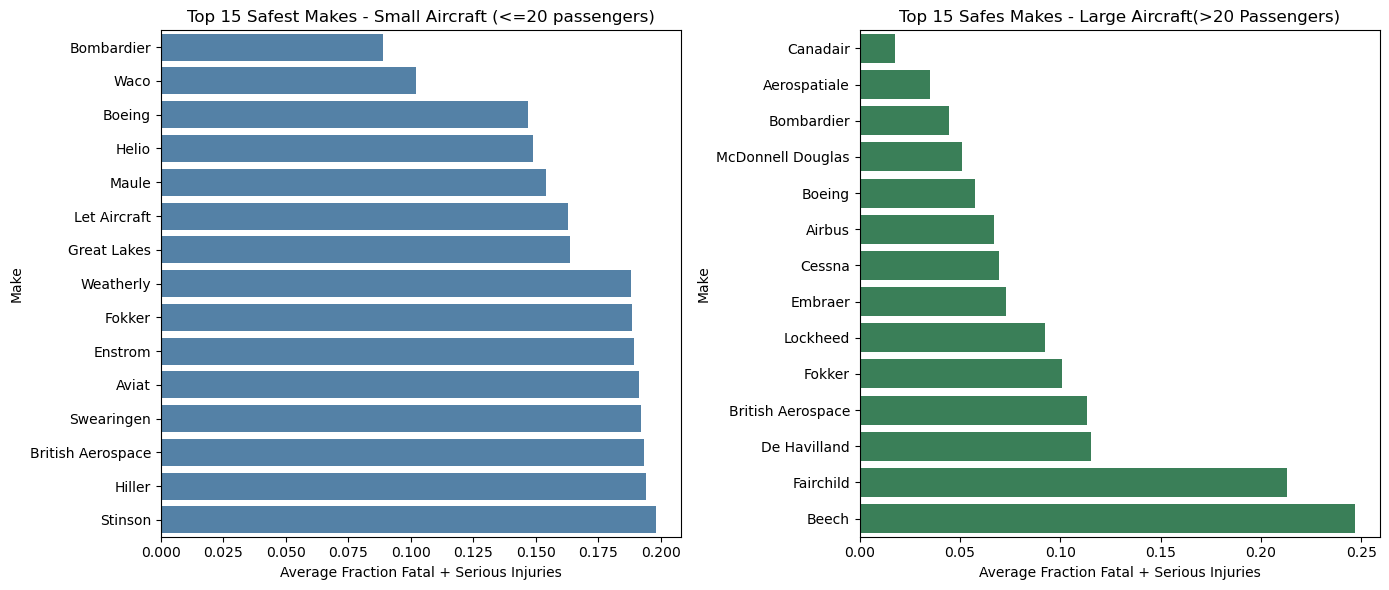

In [22]:
#Plot side-by-side

plt.figure(figsize=(14,6))

# Small planes
plt.subplot(1,2,1)
sns.barplot(
    data=small_makes_summary,
    x='Avg_Frac_Fatal_Serious',
    y='Make',
    color='steelblue'
)
plt.title('Top 15 Safest Makes - Small Aircraft (<=20 passengers)')
plt.xlabel('Average Fraction Fatal + Serious Injuries')
plt.ylabel('Make')

# Large Planes
plt.subplot(1,2,2)
sns.barplot(
    data=large_makes_summary,
    x='Avg_Frac_Fatal_Serious',
    y='Make',
    color='seagreen'
)
plt.title('Top 15 Safes Makes - Large Aircraft(>20 Passengers)')
plt.xlabel('Average Fraction Fatal + Serious Injuries')
plt.ylabel('Make')

plt.tight_layout()
plt.show()

**Distribution of injury rates: small makes**

Use a violinplot to look at the distribution of the fraction of passengers serious/fatally injured for small airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [5]:
#Select the 10 safes small makes
top10_small_makes = small_makes_summary['Make'].head(10).tolist()

top_small_df = small_planes[small_planes['Make'].isin(top10_small_makes)]

top_small_df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Frac.Fatal.Serious,fatal_accident,serious_accident,fatal_or_serious,destroyed,PlaneType,Engine.Type.Clean,Weather.Condition.Clean,Purpose.of.flight.Clean,Phase.Clean
64,20001214X42052,Accident,MIA83LA059,1983-01-10,"NEW SMYRNA BCH, FL",United States,34J,NEW SMYRNA BEACH,Non-Fatal,Substantial,...,0.00,False,False,False,False,EnstromF-28A,Reciprocating,VMC,Ferry,Maneuvering
92,20001214X41956,Accident,CHI83LA082,1983-01-15,"BRAINERD, MN",United States,NaN,NaN,Non-Fatal,Substantial,...,0.00,False,False,False,False,MauleM4-180C,Reciprocating,VMC,Unknown,Descent
193,20001214X42303,Accident,SEA83FA052,1983-02-04,"NEAR ASOTIN, WA",United States,NaN,NaN,Non-Fatal,Destroyed,...,0.25,False,True,True,True,MauleM-5-220C,Reciprocating,VMC,Business,Cruise
248,20001214X42228,Accident,LAX83FA100,1983-02-12,"TUCSON, AZ",United States,TUC,TUCSON INTERNATIONAL,Non-Fatal,Substantial,...,0.00,False,False,False,False,HelioH-395,Reciprocating,VMC,Personal,Landing
448,20001214X42487,Accident,LAX83LA134,1983-03-11,"CONCORD, CA",United States,NaN,NaN,Non-Fatal,Substantial,...,0.00,False,False,False,False,EnstromF280C,Reciprocating,VMC,Unknown,Takeoff


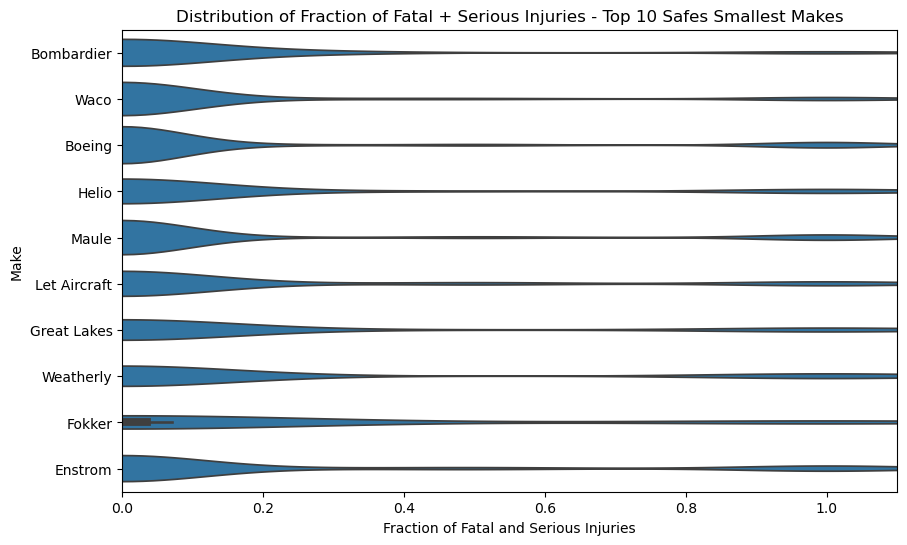

In [9]:
# Violin plot of injury fraction
plt.figure(figsize=(10,6))
sns.violinplot(
    data=top_small_df,
    x='Frac.Fatal.Serious',
    y='Make',
    order=top10_small_makes,
)
plt.title('Distribution of Fraction of Fatal + Serious Injuries - Top 10 Safes Smallest Makes')
plt.xlabel('Fraction of Fatal and Serious Injuries')
plt.ylabel('Make')
plt.xlim(0,top_small_df['Frac.Fatal.Serious'].max()*1.1)
plt.show()

**Distribution of injury rates: large makes**

Use a stripplot to look at the distribution of the fraction of passengers serious/fatally injured for large airplane makes. Just display makes with the ten lowest mean serious/fatal injury rates.

In [ ]:
# Select the 10 safest Large Makes
top10_large_makes = large_makes_summary['Make'].head(10).tolist()

# Filter large_planes to those Makes
top_large_df = large_planes[large_planes['Make'].isin(top10_large_makes)]

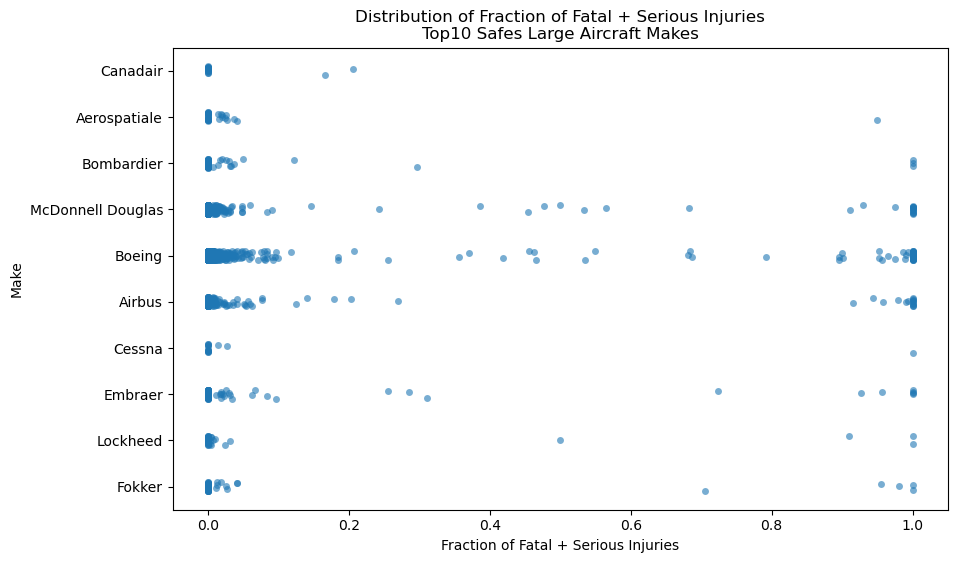

In [12]:
#Stripplot of injury fractions
plt.figure(figsize=(10,6))
sns.stripplot(
    data=top_large_df,
    x='Frac.Fatal.Serious',
    y='Make',
    order=top10_large_makes,
    jitter=True,
    alpha=0.6
)
plt.title('Distribution of Fraction of Fatal + Serious Injuries\nTop10 Safes Large Aircraft Makes')
plt.xlabel('Fraction of Fatal + Serious Injuries')
plt.ylabel('Make')

plt.show()

**Evaluate the rate of aircraft destruction for both small and large aircraft by Make.** 

Sort your results and keep the lowest 15.

In [15]:
# Summarize destruction rate by Make
def summarize_destruction_by_make(df, min_accidents=10, top_n=15):
    summary = (
        df.groupby('Make')
            .agg(
                Num_Accidents=('Make','count'),
                Destruction_Rate=('destroyed','mean')
            )
            .reset_index()
    )
    summary = summary[summary['Num_Accidents'] >= min_accidents]
    summary = summary.sort_values('Destruction_Rate').head(top_n)
    return summary

small_make_destruction = summarize_destruction_by_make(small_planes)
large_make_destruction = summarize_destruction_by_make(large_planes)

small_make_destruction, large_make_destruction

(                          Make  Num_Accidents  Destruction_Rate
 16                  Bombardier             61          0.032787
 6                       Airbus            180          0.033333
 8   American Champion Aircraft             54          0.037037
 25    Diamond Aircraft Ind Inc             74          0.054054
 31               Flight Design             50          0.060000
 15                      Boeing           1302          0.061444
 56                       Raven             79          0.063291
 11               Balloon Works            139          0.064748
 9                        Aviat            217          0.069124
 43                Let Aircraft            135          0.081481
 69                        Waco            139          0.086331
 46                       Maule            571          0.092820
 45                    Luscombe            390          0.102564
 18               Burkhart Grob            121          0.107438
 62                  Schl

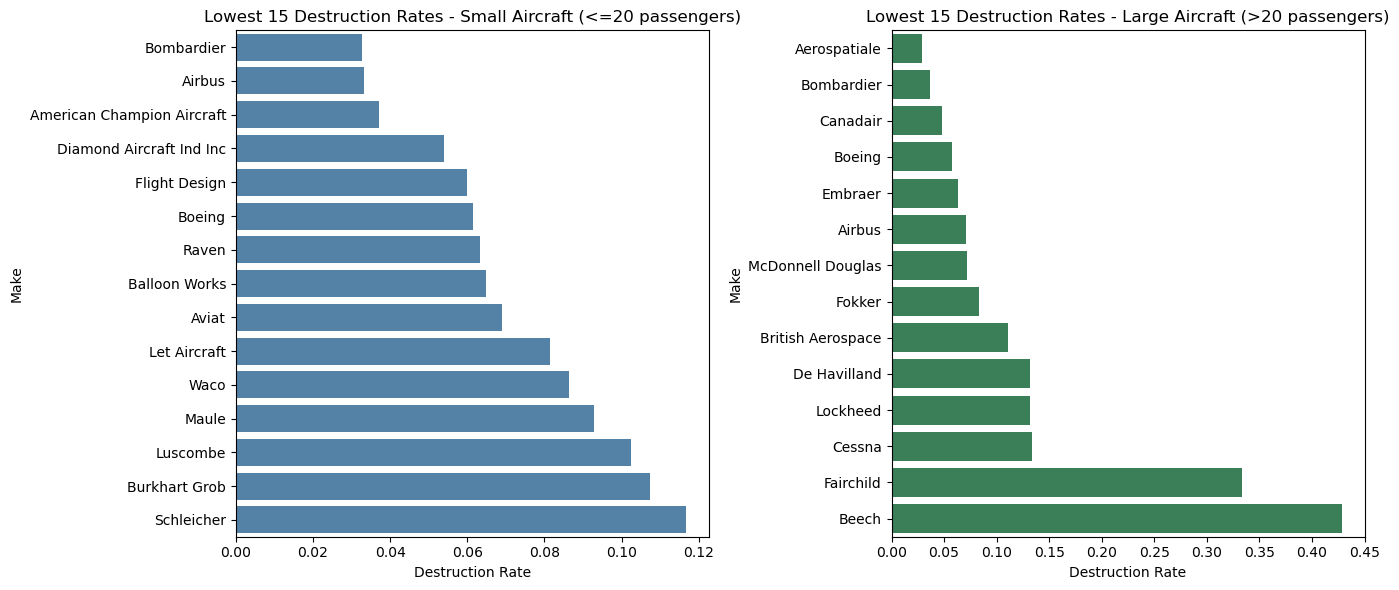

In [17]:
# Plot side-by-side destruction rate

plt.figure(figsize=(14,6))

# Small planes
plt.subplot(1,2,1)
sns.barplot(
    data=small_make_destruction,
    x='Destruction_Rate',
    y='Make',
    color='steelblue'
)
plt.title('Lowest 15 Destruction Rates - Small Aircraft (<=20 passengers)')
plt.xlabel('Destruction Rate')
plt.ylabel('Make')

# Large planes
plt.subplot(1,2,2)
sns.barplot(
    data=large_make_destruction,
    x='Destruction_Rate',
    y='Make',
    color='seagreen'
)
plt.title('Lowest 15 Destruction Rates - Large Aircraft (>20 passengers)')
plt.xlabel('Destruction Rate')
plt.ylabel('Make')

plt.tight_layout()
plt.show()

#### Provide a short discussion on your findings for your summary statistics and plots:
- Make any recommendations for Makes here based off of the destroyed fraction and fraction fatally/seriously injured
- Comment on the calculated statistics and any corresponding distributions you have visualized.

### Discussion of Findings

The summary statistics and visualizations reveal meaningful differences in safety outcomes across aircraft manufacturers when evaluated by both fraction of fatal/serious injuries and aircraft destruction rate.

Among small aircraft, several makes such as Bombardier, Waco, and Boeing consistently appear among the lowest in average fatal/serious injury rates while also maintaining relatively low destruction rates. This suggests that, for these manufacturers, accidents tend to be more survivable and less likely to result in total aircraft loss. However, some small-aircraft makes with moderate injury rates exhibit noticeably higher destruction rates, indicating that low passenger injury does not always coincide with reduced structural loss.

For large aircraft, manufacturers such as Aerospatiale, Bombardier, Canadair, and Boeing show both low average injury severity and low destruction rates. The stripplot distributions further show that while most incidents cluster near zero injury severity, there are occasional high-severity outliers across nearly all makes. This highlights that catastrophic outcomes, while rare, are not exclusive to any single manufacturer.

The violin and strip plots emphasize that injury outcomes are highly right-skewed: most accidents involve low fractions of serious or fatal injuries, but a small number of severe events significantly influence the mean. This reinforces the importance of examining full distributions rather than relying solely on averages.

### Recommendations
- Aircraft makes with consistently low injury severity and low destruction rates (e.g., Bombardier and Boeing across both size categories) appear to offer more robust overall safety performance.
- Decision-makers should consider both injury severity and destruction rate together, as focusing on only one metric may obscure important safety trade-offs.
- Manufacturers or operators associated with higher destruction rates—even when injury rates are moderate—may warrant further investigation into aircraft structural resilience and crash survivability.

### Analyze plane types
- plot the mean fatal/seriously injured fraction for both small and larger planes 
- also provide a distributional plot of your choice for the fatal/seriously injured fraction by airplane type (stripplot, violin, etc)  
- filter ensuring that you have at least ten individual examples in each model/make to average over

**Larger planes**

**Smaller planes**
- for smaller planes, limit your plotted results to the makes with the 10 lowest mean serious/fatal injury fractions

### Discussion of Specific Airplane Types
- Discuss what you have found above regarding passenger fraction seriously/ both small and large airplane models.

### Exploring Other Variables
- Investigate how other variables effect aircraft damage and injury. You must choose **two** factors out of the following but are free to analyze more:

- Weather Condition
- Engine Type
- Number of Engines
- Phase of Flight
- Purpose of Flight

For each factor provide a discussion explaining your analysis with appropriate visualization / data summaries and interpreting your findings.